In [1]:
#pandas, para lectura de datos.
import pandas as pd 

#numpy,  carga de datos en memoria
import numpy as np

#matplotlib, para graficar.
import matplotlib.pyplot as plt 

#Sequential es fundamental para apilar capas que pueden conformar una red neuronal o simplemente una función matématica.   
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.datasets import cifar10

In [2]:
#Función para Graficar los resultados

def graficar_resultados(historia):
	plt.subplot(1,2,1)
	plt.plot(historia.history['loss'])
	plt.plot(historia.history['val_loss'])
	plt.ylabel('Pérdida')
	plt.xlabel('Iteración')
	plt.legend(['Entrenamiento','Validación'])

	plt.subplot(1,2,2)
	plt.plot(historia.history['accuracy'])
	plt.plot(historia.history['val_accuracy'])
	plt.ylabel('Precisión')
	plt.xlabel('Iteración')
	plt.legend(['Entrenamiento','Validación'])

	ax = plt.gca()
	ax.yaxis.set_label_position("right")
	ax.yaxis.tick_right()

	plt.show()

In [3]:
# 1. Lectura y pre-procesamiento del dataset
#-------------------------------------------------------------

# Carga de datos del set Cifar, que comprende de imagenes de 32 x 32 pixeles con 10 posibles
# categorias (ave, avion, automovil, gato, perro, caballo, rana, camion, barco y, venado)

(X_train, y_train), (X_test, y_test)= cifar10.load_data()

170500096/170498071 [==============================] - 591s 3us/step


In [4]:
X_train.shape

#Hay 50.000 imagenes de 32 x 32 pixeles a color, por el numero 3.

(50000, 32, 32, 3)

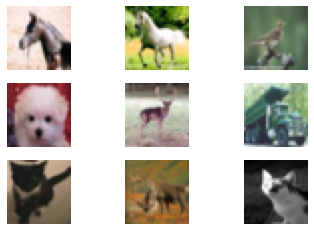

In [5]:
# Selecciòn de 9 imágenes aleatorias.
for i in range(9):
	ind_img = np.random.randint(low=0,high=X_train.shape[0])
	plt.subplot(3,3,i+1)
	plt.imshow(X_train[ind_img])
	plt.axis('off')
plt.show()

In [6]:
# Codificación one-hot para las categorías
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

# Normalizar pixeles al rango 0-1 (originalmente de 0-255)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

#255 es el numero mayor contenido en el set 

# Aplanamos cada imagen, pasando de matrices de 32x32x3 a 3072 (requerido por la red neuronal)
# Las redes neuronales aceptan vectores, no matrices.

m = X_train.shape[0] # Número de datos de entrenamiento
n = X_test.shape[0]  # Número de datos de validación
nrows, ncols, nplanos = X_train.shape[1], X_train.shape[2], X_train.shape[3]

#(50000, 32, 32, 3)

X_train = np.reshape(X_train, (m, nrows*ncols*nplanos))
X_test = np.reshape(X_test, (n, nrows*ncols*nplanos))

In [10]:
#X_train.shape
Y_train.shape

(50000, 10)

In [11]:
# 2. Creación primera red neuronal:
#-------------------------------------------------------------


# - Capa de entrada: su dimensión será 3072 (el tamaño de cada imagen aplanada),
# - Capa oculta: 15 neuronas con activación ReLU,
# - Capa de salida: función de activación 'softmax' (clasificación multiclase) y un
#     total de 10 categorías

#X_train.shape
#(50000, 3072)
input_dim = X_train.shape[1]  # 3072
#(50000, 10)
output_dim = Y_train.shape[1] # 10 

modelo = Sequential()
modelo.add( Dense(15, input_dim=input_dim, activation='relu'))
modelo.add( Dense(output_dim, activation='softmax'))

# Compilación y entrenamiento: gradiente descendente, learning rate = 0.05, función
# de error: entropía cruzada, métrica de desempeño: precisión

sgd = SGD(lr=0.05)
modelo.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Para el entrenamiento se usarán 2000 iteraciones y un batch_size de 1024
num_epochs = 2000
batch_size = 1024 # 2 e10
historia = modelo.fit(X_train, Y_train, validation_data = (X_test,Y_test),epochs=num_epochs, batch_size=batch_size, verbose=2)

Epoch 1/2000
49/49 - 1s - loss: 2.2490 - accuracy: 0.1290 - val_loss: 2.1586 - val_accuracy: 0.1692
Epoch 2/2000
49/49 - 0s - loss: 2.1341 - accuracy: 0.2108 - val_loss: 2.0720 - val_accuracy: 0.2489
Epoch 3/2000
49/49 - 0s - loss: 2.0596 - accuracy: 0.2425 - val_loss: 1.9985 - val_accuracy: 0.2727
Epoch 4/2000
49/49 - 0s - loss: 2.0023 - accuracy: 0.2636 - val_loss: 1.9614 - val_accuracy: 0.2811
Epoch 5/2000
49/49 - 0s - loss: 1.9747 - accuracy: 0.2783 - val_loss: 1.9885 - val_accuracy: 0.2661
Epoch 6/2000
49/49 - 0s - loss: 1.9522 - accuracy: 0.2852 - val_loss: 1.9714 - val_accuracy: 0.2897
Epoch 7/2000
49/49 - 0s - loss: 1.9313 - accuracy: 0.2943 - val_loss: 1.9088 - val_accuracy: 0.2973
Epoch 8/2000
49/49 - 0s - loss: 1.9188 - accuracy: 0.2988 - val_loss: 2.0246 - val_accuracy: 0.2323
Epoch 9/2000
49/49 - 0s - loss: 1.9039 - accuracy: 0.3040 - val_loss: 1.9009 - val_accuracy: 0.3136
Epoch 10/2000
49/49 - 0s - loss: 1.9024 - accuracy: 0.3090 - val_loss: 1.9018 - val_accuracy: 0.3000

Epoch 83/2000
49/49 - 0s - loss: 1.6479 - accuracy: 0.4207 - val_loss: 1.6630 - val_accuracy: 0.4128
Epoch 84/2000
49/49 - 0s - loss: 1.6582 - accuracy: 0.4182 - val_loss: 1.6592 - val_accuracy: 0.4133
Epoch 85/2000
49/49 - 0s - loss: 1.6528 - accuracy: 0.4186 - val_loss: 1.6609 - val_accuracy: 0.4113
Epoch 86/2000
49/49 - 0s - loss: 1.6437 - accuracy: 0.4210 - val_loss: 1.6595 - val_accuracy: 0.4161
Epoch 87/2000
49/49 - 0s - loss: 1.6407 - accuracy: 0.4225 - val_loss: 1.6425 - val_accuracy: 0.4166
Epoch 88/2000
49/49 - 0s - loss: 1.6441 - accuracy: 0.4211 - val_loss: 1.6587 - val_accuracy: 0.4147
Epoch 89/2000
49/49 - 0s - loss: 1.6381 - accuracy: 0.4240 - val_loss: 1.6565 - val_accuracy: 0.4147
Epoch 90/2000
49/49 - 0s - loss: 1.6445 - accuracy: 0.4216 - val_loss: 1.6375 - val_accuracy: 0.4216
Epoch 91/2000
49/49 - 0s - loss: 1.6388 - accuracy: 0.4245 - val_loss: 1.7175 - val_accuracy: 0.3943
Epoch 92/2000
49/49 - 0s - loss: 1.6335 - accuracy: 0.4254 - val_loss: 1.6387 - val_accurac

Epoch 164/2000
49/49 - 0s - loss: 1.5811 - accuracy: 0.4414 - val_loss: 1.6190 - val_accuracy: 0.4280
Epoch 165/2000
49/49 - 0s - loss: 1.5728 - accuracy: 0.4453 - val_loss: 1.6195 - val_accuracy: 0.4309
Epoch 166/2000
49/49 - 0s - loss: 1.5798 - accuracy: 0.4423 - val_loss: 1.6262 - val_accuracy: 0.4219
Epoch 167/2000
49/49 - 0s - loss: 1.5770 - accuracy: 0.4464 - val_loss: 1.6019 - val_accuracy: 0.4369
Epoch 168/2000
49/49 - 0s - loss: 1.5769 - accuracy: 0.4446 - val_loss: 1.6671 - val_accuracy: 0.4060
Epoch 169/2000
49/49 - 0s - loss: 1.5741 - accuracy: 0.4449 - val_loss: 1.5986 - val_accuracy: 0.4367
Epoch 170/2000
49/49 - 0s - loss: 1.5730 - accuracy: 0.4457 - val_loss: 1.6323 - val_accuracy: 0.4250
Epoch 171/2000
49/49 - 0s - loss: 1.5718 - accuracy: 0.4456 - val_loss: 1.6184 - val_accuracy: 0.4292
Epoch 172/2000
49/49 - 0s - loss: 1.5737 - accuracy: 0.4462 - val_loss: 1.6117 - val_accuracy: 0.4326
Epoch 173/2000
49/49 - 0s - loss: 1.5808 - accuracy: 0.4448 - val_loss: 1.6107 - v

Epoch 245/2000
49/49 - 0s - loss: 1.5313 - accuracy: 0.4609 - val_loss: 1.5739 - val_accuracy: 0.4461
Epoch 246/2000
49/49 - 0s - loss: 1.5328 - accuracy: 0.4612 - val_loss: 1.5696 - val_accuracy: 0.4457
Epoch 247/2000
49/49 - 0s - loss: 1.5349 - accuracy: 0.4599 - val_loss: 1.5974 - val_accuracy: 0.4358
Epoch 248/2000
49/49 - 0s - loss: 1.5278 - accuracy: 0.4598 - val_loss: 1.5847 - val_accuracy: 0.4417
Epoch 249/2000
49/49 - 0s - loss: 1.5274 - accuracy: 0.4632 - val_loss: 1.6264 - val_accuracy: 0.4201
Epoch 250/2000
49/49 - 0s - loss: 1.5364 - accuracy: 0.4599 - val_loss: 1.5940 - val_accuracy: 0.4313
Epoch 251/2000
49/49 - 0s - loss: 1.5249 - accuracy: 0.4620 - val_loss: 1.6062 - val_accuracy: 0.4268
Epoch 252/2000
49/49 - 0s - loss: 1.5319 - accuracy: 0.4604 - val_loss: 1.5591 - val_accuracy: 0.4477
Epoch 253/2000
49/49 - 0s - loss: 1.5245 - accuracy: 0.4657 - val_loss: 1.5705 - val_accuracy: 0.4456
Epoch 254/2000
49/49 - 0s - loss: 1.5239 - accuracy: 0.4625 - val_loss: 1.5854 - v

Epoch 326/2000
49/49 - 0s - loss: 1.5049 - accuracy: 0.4688 - val_loss: 1.5928 - val_accuracy: 0.4391
Epoch 327/2000
49/49 - 0s - loss: 1.5021 - accuracy: 0.4714 - val_loss: 1.5973 - val_accuracy: 0.4380
Epoch 328/2000
49/49 - 0s - loss: 1.5121 - accuracy: 0.4674 - val_loss: 1.5698 - val_accuracy: 0.4389
Epoch 329/2000
49/49 - 0s - loss: 1.4994 - accuracy: 0.4707 - val_loss: 1.5988 - val_accuracy: 0.4391
Epoch 330/2000
49/49 - 0s - loss: 1.4997 - accuracy: 0.4717 - val_loss: 1.5443 - val_accuracy: 0.4569
Epoch 331/2000
49/49 - 0s - loss: 1.4877 - accuracy: 0.4769 - val_loss: 1.5677 - val_accuracy: 0.4490
Epoch 332/2000
49/49 - 0s - loss: 1.5028 - accuracy: 0.4704 - val_loss: 1.6270 - val_accuracy: 0.4298
Epoch 333/2000
49/49 - 0s - loss: 1.4986 - accuracy: 0.4717 - val_loss: 1.5539 - val_accuracy: 0.4494
Epoch 334/2000
49/49 - 0s - loss: 1.5094 - accuracy: 0.4688 - val_loss: 1.5826 - val_accuracy: 0.4409
Epoch 335/2000
49/49 - 0s - loss: 1.4984 - accuracy: 0.4724 - val_loss: 1.6009 - v

Epoch 407/2000
49/49 - 1s - loss: 1.4847 - accuracy: 0.4783 - val_loss: 1.5633 - val_accuracy: 0.4487
Epoch 408/2000
49/49 - 0s - loss: 1.4864 - accuracy: 0.4772 - val_loss: 1.5646 - val_accuracy: 0.4498
Epoch 409/2000
49/49 - 0s - loss: 1.4765 - accuracy: 0.4788 - val_loss: 1.5608 - val_accuracy: 0.4506
Epoch 410/2000
49/49 - 0s - loss: 1.4849 - accuracy: 0.4764 - val_loss: 1.5841 - val_accuracy: 0.4431
Epoch 411/2000
49/49 - 0s - loss: 1.4754 - accuracy: 0.4801 - val_loss: 1.5610 - val_accuracy: 0.4517
Epoch 412/2000
49/49 - 0s - loss: 1.4717 - accuracy: 0.4813 - val_loss: 1.5648 - val_accuracy: 0.4452
Epoch 413/2000
49/49 - 0s - loss: 1.4777 - accuracy: 0.4802 - val_loss: 1.5565 - val_accuracy: 0.4501
Epoch 414/2000
49/49 - 1s - loss: 1.4829 - accuracy: 0.4768 - val_loss: 1.5549 - val_accuracy: 0.4526
Epoch 415/2000
49/49 - 0s - loss: 1.4894 - accuracy: 0.4740 - val_loss: 1.5820 - val_accuracy: 0.4412
Epoch 416/2000
49/49 - 0s - loss: 1.4828 - accuracy: 0.4783 - val_loss: 1.5590 - v

Epoch 488/2000
49/49 - 0s - loss: 1.4673 - accuracy: 0.4831 - val_loss: 1.5582 - val_accuracy: 0.4506
Epoch 489/2000
49/49 - 0s - loss: 1.4570 - accuracy: 0.4867 - val_loss: 1.5627 - val_accuracy: 0.4482
Epoch 490/2000
49/49 - 0s - loss: 1.4679 - accuracy: 0.4812 - val_loss: 1.5578 - val_accuracy: 0.4551
Epoch 491/2000
49/49 - 0s - loss: 1.4620 - accuracy: 0.4860 - val_loss: 1.5515 - val_accuracy: 0.4546
Epoch 492/2000
49/49 - 0s - loss: 1.4629 - accuracy: 0.4830 - val_loss: 1.5724 - val_accuracy: 0.4455
Epoch 493/2000
49/49 - 0s - loss: 1.4592 - accuracy: 0.4836 - val_loss: 1.5980 - val_accuracy: 0.4403
Epoch 494/2000
49/49 - 0s - loss: 1.4565 - accuracy: 0.4856 - val_loss: 1.5878 - val_accuracy: 0.4442
Epoch 495/2000
49/49 - 0s - loss: 1.4600 - accuracy: 0.4829 - val_loss: 1.5555 - val_accuracy: 0.4499
Epoch 496/2000
49/49 - 0s - loss: 1.4691 - accuracy: 0.4791 - val_loss: 1.6017 - val_accuracy: 0.4366
Epoch 497/2000
49/49 - 1s - loss: 1.4627 - accuracy: 0.4832 - val_loss: 1.5580 - v

Epoch 569/2000
49/49 - 1s - loss: 1.4563 - accuracy: 0.4846 - val_loss: 1.5477 - val_accuracy: 0.4541
Epoch 570/2000
49/49 - 0s - loss: 1.4542 - accuracy: 0.4854 - val_loss: 1.5394 - val_accuracy: 0.4562
Epoch 571/2000
49/49 - 0s - loss: 1.4355 - accuracy: 0.4944 - val_loss: 1.5877 - val_accuracy: 0.4458
Epoch 572/2000
49/49 - 0s - loss: 1.4522 - accuracy: 0.4873 - val_loss: 1.5497 - val_accuracy: 0.4553
Epoch 573/2000
49/49 - 0s - loss: 1.4435 - accuracy: 0.4899 - val_loss: 1.5401 - val_accuracy: 0.4545
Epoch 574/2000
49/49 - 0s - loss: 1.4393 - accuracy: 0.4915 - val_loss: 1.5503 - val_accuracy: 0.4516
Epoch 575/2000
49/49 - 0s - loss: 1.4453 - accuracy: 0.4898 - val_loss: 1.5616 - val_accuracy: 0.4501
Epoch 576/2000
49/49 - 0s - loss: 1.4524 - accuracy: 0.4872 - val_loss: 1.5374 - val_accuracy: 0.4552
Epoch 577/2000
49/49 - 0s - loss: 1.4485 - accuracy: 0.4896 - val_loss: 1.5536 - val_accuracy: 0.4482
Epoch 578/2000
49/49 - 0s - loss: 1.4420 - accuracy: 0.4902 - val_loss: 1.5392 - v

Epoch 650/2000
49/49 - 1s - loss: 1.4436 - accuracy: 0.4913 - val_loss: 1.5567 - val_accuracy: 0.4454
Epoch 651/2000
49/49 - 0s - loss: 1.4324 - accuracy: 0.4933 - val_loss: 1.6240 - val_accuracy: 0.4228
Epoch 652/2000
49/49 - 0s - loss: 1.4410 - accuracy: 0.4917 - val_loss: 1.5617 - val_accuracy: 0.4505
Epoch 653/2000
49/49 - 0s - loss: 1.4411 - accuracy: 0.4929 - val_loss: 1.6130 - val_accuracy: 0.4325
Epoch 654/2000
49/49 - 0s - loss: 1.4371 - accuracy: 0.4912 - val_loss: 1.5401 - val_accuracy: 0.4583
Epoch 655/2000
49/49 - 0s - loss: 1.4316 - accuracy: 0.4958 - val_loss: 1.5630 - val_accuracy: 0.4521
Epoch 656/2000
49/49 - 1s - loss: 1.4354 - accuracy: 0.4937 - val_loss: 1.5531 - val_accuracy: 0.4500
Epoch 657/2000
49/49 - 0s - loss: 1.4318 - accuracy: 0.4943 - val_loss: 1.5697 - val_accuracy: 0.4407
Epoch 658/2000
49/49 - 0s - loss: 1.4306 - accuracy: 0.4954 - val_loss: 1.5418 - val_accuracy: 0.4537
Epoch 659/2000
49/49 - 0s - loss: 1.4327 - accuracy: 0.4932 - val_loss: 1.5788 - v

Epoch 731/2000
49/49 - 0s - loss: 1.4235 - accuracy: 0.4971 - val_loss: 1.5560 - val_accuracy: 0.4510
Epoch 732/2000
49/49 - 0s - loss: 1.4285 - accuracy: 0.4972 - val_loss: 1.5512 - val_accuracy: 0.4501
Epoch 733/2000
49/49 - 0s - loss: 1.4161 - accuracy: 0.4998 - val_loss: 1.5752 - val_accuracy: 0.4463
Epoch 734/2000
49/49 - 0s - loss: 1.4346 - accuracy: 0.4942 - val_loss: 1.5630 - val_accuracy: 0.4510
Epoch 735/2000
49/49 - 0s - loss: 1.4237 - accuracy: 0.4983 - val_loss: 1.5995 - val_accuracy: 0.4395
Epoch 736/2000
49/49 - 0s - loss: 1.4334 - accuracy: 0.4936 - val_loss: 1.5479 - val_accuracy: 0.4530
Epoch 737/2000
49/49 - 0s - loss: 1.4159 - accuracy: 0.4997 - val_loss: 1.5879 - val_accuracy: 0.4365
Epoch 738/2000
49/49 - 0s - loss: 1.4245 - accuracy: 0.4952 - val_loss: 1.5383 - val_accuracy: 0.4561
Epoch 739/2000
49/49 - 0s - loss: 1.4089 - accuracy: 0.5020 - val_loss: 1.5552 - val_accuracy: 0.4507
Epoch 740/2000
49/49 - 0s - loss: 1.4273 - accuracy: 0.4935 - val_loss: 1.5346 - v

Epoch 812/2000
49/49 - 0s - loss: 1.4151 - accuracy: 0.5006 - val_loss: 1.5572 - val_accuracy: 0.4513
Epoch 813/2000
49/49 - 0s - loss: 1.4157 - accuracy: 0.4992 - val_loss: 1.6020 - val_accuracy: 0.4394
Epoch 814/2000
49/49 - 0s - loss: 1.4144 - accuracy: 0.4985 - val_loss: 1.5547 - val_accuracy: 0.4527
Epoch 815/2000
49/49 - 1s - loss: 1.4006 - accuracy: 0.5040 - val_loss: 1.5492 - val_accuracy: 0.4533
Epoch 816/2000
49/49 - 0s - loss: 1.4109 - accuracy: 0.5019 - val_loss: 1.6164 - val_accuracy: 0.4256
Epoch 817/2000
49/49 - 0s - loss: 1.4175 - accuracy: 0.4998 - val_loss: 1.5779 - val_accuracy: 0.4423
Epoch 818/2000
49/49 - 0s - loss: 1.4264 - accuracy: 0.4958 - val_loss: 1.5788 - val_accuracy: 0.4423
Epoch 819/2000
49/49 - 0s - loss: 1.4207 - accuracy: 0.4974 - val_loss: 1.5408 - val_accuracy: 0.4545
Epoch 820/2000
49/49 - 0s - loss: 1.4166 - accuracy: 0.4988 - val_loss: 1.5733 - val_accuracy: 0.4430
Epoch 821/2000
49/49 - 0s - loss: 1.4164 - accuracy: 0.4988 - val_loss: 1.5540 - v

Epoch 893/2000
49/49 - 1s - loss: 1.4028 - accuracy: 0.5022 - val_loss: 1.5586 - val_accuracy: 0.4458
Epoch 894/2000
49/49 - 0s - loss: 1.4074 - accuracy: 0.5007 - val_loss: 1.5493 - val_accuracy: 0.4515
Epoch 895/2000
49/49 - 0s - loss: 1.4150 - accuracy: 0.5029 - val_loss: 1.6337 - val_accuracy: 0.4316
Epoch 896/2000
49/49 - 0s - loss: 1.4164 - accuracy: 0.4998 - val_loss: 1.5463 - val_accuracy: 0.4528
Epoch 897/2000
49/49 - 0s - loss: 1.4089 - accuracy: 0.5023 - val_loss: 1.5799 - val_accuracy: 0.4416
Epoch 898/2000
49/49 - 0s - loss: 1.4120 - accuracy: 0.5020 - val_loss: 1.5670 - val_accuracy: 0.4467
Epoch 899/2000
49/49 - 0s - loss: 1.4112 - accuracy: 0.5021 - val_loss: 1.6676 - val_accuracy: 0.4139
Epoch 900/2000
49/49 - 0s - loss: 1.4047 - accuracy: 0.5042 - val_loss: 1.5854 - val_accuracy: 0.4446
Epoch 901/2000
49/49 - 0s - loss: 1.4081 - accuracy: 0.5009 - val_loss: 1.5599 - val_accuracy: 0.4520
Epoch 902/2000
49/49 - 0s - loss: 1.4091 - accuracy: 0.5005 - val_loss: 1.5686 - v

Epoch 974/2000
49/49 - 0s - loss: 1.4099 - accuracy: 0.5017 - val_loss: 1.5976 - val_accuracy: 0.4399
Epoch 975/2000
49/49 - 1s - loss: 1.4017 - accuracy: 0.5050 - val_loss: 1.5661 - val_accuracy: 0.4485
Epoch 976/2000
49/49 - 1s - loss: 1.4079 - accuracy: 0.5032 - val_loss: 1.5459 - val_accuracy: 0.4529
Epoch 977/2000
49/49 - 0s - loss: 1.3962 - accuracy: 0.5064 - val_loss: 1.5500 - val_accuracy: 0.4517
Epoch 978/2000
49/49 - 1s - loss: 1.4095 - accuracy: 0.5037 - val_loss: 1.5814 - val_accuracy: 0.4404
Epoch 979/2000
49/49 - 0s - loss: 1.4029 - accuracy: 0.5055 - val_loss: 1.5433 - val_accuracy: 0.4546
Epoch 980/2000
49/49 - 0s - loss: 1.3913 - accuracy: 0.5087 - val_loss: 1.5771 - val_accuracy: 0.4403
Epoch 981/2000
49/49 - 1s - loss: 1.3978 - accuracy: 0.5040 - val_loss: 1.5811 - val_accuracy: 0.4432
Epoch 982/2000
49/49 - 1s - loss: 1.4170 - accuracy: 0.4981 - val_loss: 1.5635 - val_accuracy: 0.4480
Epoch 983/2000
49/49 - 0s - loss: 1.4037 - accuracy: 0.5049 - val_loss: 1.5522 - v

Epoch 1054/2000
49/49 - 1s - loss: 1.3987 - accuracy: 0.5064 - val_loss: 1.6039 - val_accuracy: 0.4336
Epoch 1055/2000
49/49 - 1s - loss: 1.3988 - accuracy: 0.5056 - val_loss: 1.5561 - val_accuracy: 0.4523
Epoch 1056/2000
49/49 - 0s - loss: 1.3904 - accuracy: 0.5081 - val_loss: 1.5524 - val_accuracy: 0.4519
Epoch 1057/2000
49/49 - 0s - loss: 1.3930 - accuracy: 0.5076 - val_loss: 1.5985 - val_accuracy: 0.4367
Epoch 1058/2000
49/49 - 0s - loss: 1.3980 - accuracy: 0.5063 - val_loss: 1.5375 - val_accuracy: 0.4599
Epoch 1059/2000
49/49 - 0s - loss: 1.3954 - accuracy: 0.5071 - val_loss: 1.5475 - val_accuracy: 0.4533
Epoch 1060/2000
49/49 - 0s - loss: 1.3901 - accuracy: 0.5113 - val_loss: 1.5679 - val_accuracy: 0.4510
Epoch 1061/2000
49/49 - 0s - loss: 1.4031 - accuracy: 0.5047 - val_loss: 1.5691 - val_accuracy: 0.4450
Epoch 1062/2000
49/49 - 0s - loss: 1.3904 - accuracy: 0.5083 - val_loss: 1.5554 - val_accuracy: 0.4536
Epoch 1063/2000
49/49 - 0s - loss: 1.3973 - accuracy: 0.5060 - val_loss: 

Epoch 1134/2000
49/49 - 0s - loss: 1.3917 - accuracy: 0.5105 - val_loss: 1.5742 - val_accuracy: 0.4460
Epoch 1135/2000
49/49 - 0s - loss: 1.3925 - accuracy: 0.5077 - val_loss: 1.6039 - val_accuracy: 0.4315
Epoch 1136/2000
49/49 - 0s - loss: 1.4038 - accuracy: 0.5038 - val_loss: 1.5629 - val_accuracy: 0.4479
Epoch 1137/2000
49/49 - 0s - loss: 1.3942 - accuracy: 0.5065 - val_loss: 1.5948 - val_accuracy: 0.4441
Epoch 1138/2000
49/49 - 0s - loss: 1.3843 - accuracy: 0.5100 - val_loss: 1.6061 - val_accuracy: 0.4385
Epoch 1139/2000
49/49 - 0s - loss: 1.3969 - accuracy: 0.5042 - val_loss: 1.5647 - val_accuracy: 0.4460
Epoch 1140/2000
49/49 - 0s - loss: 1.3887 - accuracy: 0.5083 - val_loss: 1.5766 - val_accuracy: 0.4471
Epoch 1141/2000
49/49 - 0s - loss: 1.3859 - accuracy: 0.5103 - val_loss: 1.5543 - val_accuracy: 0.4532
Epoch 1142/2000
49/49 - 0s - loss: 1.3898 - accuracy: 0.5077 - val_loss: 1.5894 - val_accuracy: 0.4378
Epoch 1143/2000
49/49 - 0s - loss: 1.3820 - accuracy: 0.5122 - val_loss: 

Epoch 1214/2000
49/49 - 0s - loss: 1.3892 - accuracy: 0.5096 - val_loss: 1.5940 - val_accuracy: 0.4412
Epoch 1215/2000
49/49 - 0s - loss: 1.3827 - accuracy: 0.5105 - val_loss: 1.5551 - val_accuracy: 0.4493
Epoch 1216/2000
49/49 - 0s - loss: 1.3940 - accuracy: 0.5079 - val_loss: 1.5575 - val_accuracy: 0.4540
Epoch 1217/2000
49/49 - 0s - loss: 1.3739 - accuracy: 0.5116 - val_loss: 1.5494 - val_accuracy: 0.4540
Epoch 1218/2000
49/49 - 1s - loss: 1.3786 - accuracy: 0.5122 - val_loss: 1.5738 - val_accuracy: 0.4467
Epoch 1219/2000
49/49 - 1s - loss: 1.4010 - accuracy: 0.5048 - val_loss: 1.6240 - val_accuracy: 0.4371
Epoch 1220/2000
49/49 - 0s - loss: 1.3875 - accuracy: 0.5095 - val_loss: 1.6037 - val_accuracy: 0.4383
Epoch 1221/2000
49/49 - 0s - loss: 1.3783 - accuracy: 0.5115 - val_loss: 1.5705 - val_accuracy: 0.4512
Epoch 1222/2000
49/49 - 0s - loss: 1.3763 - accuracy: 0.5122 - val_loss: 1.5737 - val_accuracy: 0.4433
Epoch 1223/2000
49/49 - 0s - loss: 1.3878 - accuracy: 0.5100 - val_loss: 

Epoch 1294/2000
49/49 - 0s - loss: 1.3820 - accuracy: 0.5116 - val_loss: 1.5562 - val_accuracy: 0.4519
Epoch 1295/2000
49/49 - 0s - loss: 1.3859 - accuracy: 0.5114 - val_loss: 1.5905 - val_accuracy: 0.4438
Epoch 1296/2000
49/49 - 0s - loss: 1.3865 - accuracy: 0.5088 - val_loss: 1.5560 - val_accuracy: 0.4575
Epoch 1297/2000
49/49 - 0s - loss: 1.3733 - accuracy: 0.5142 - val_loss: 1.6232 - val_accuracy: 0.4306
Epoch 1298/2000
49/49 - 0s - loss: 1.3853 - accuracy: 0.5093 - val_loss: 1.5788 - val_accuracy: 0.4466
Epoch 1299/2000
49/49 - 0s - loss: 1.3746 - accuracy: 0.5125 - val_loss: 1.5588 - val_accuracy: 0.4508
Epoch 1300/2000
49/49 - 0s - loss: 1.3897 - accuracy: 0.5074 - val_loss: 1.5523 - val_accuracy: 0.4514
Epoch 1301/2000
49/49 - 0s - loss: 1.3843 - accuracy: 0.5094 - val_loss: 1.5687 - val_accuracy: 0.4498
Epoch 1302/2000
49/49 - 0s - loss: 1.3869 - accuracy: 0.5095 - val_loss: 1.5714 - val_accuracy: 0.4485
Epoch 1303/2000
49/49 - 0s - loss: 1.3723 - accuracy: 0.5143 - val_loss: 

Epoch 1374/2000
49/49 - 0s - loss: 1.3720 - accuracy: 0.5152 - val_loss: 1.5516 - val_accuracy: 0.4530
Epoch 1375/2000
49/49 - 0s - loss: 1.3589 - accuracy: 0.5201 - val_loss: 1.6200 - val_accuracy: 0.4309
Epoch 1376/2000
49/49 - 0s - loss: 1.3834 - accuracy: 0.5108 - val_loss: 1.5729 - val_accuracy: 0.4496
Epoch 1377/2000
49/49 - 0s - loss: 1.3834 - accuracy: 0.5117 - val_loss: 1.5675 - val_accuracy: 0.4471
Epoch 1378/2000
49/49 - 0s - loss: 1.3732 - accuracy: 0.5136 - val_loss: 1.5719 - val_accuracy: 0.4498
Epoch 1379/2000
49/49 - 0s - loss: 1.3853 - accuracy: 0.5097 - val_loss: 1.5902 - val_accuracy: 0.4481
Epoch 1380/2000
49/49 - 0s - loss: 1.3681 - accuracy: 0.5154 - val_loss: 1.5838 - val_accuracy: 0.4443
Epoch 1381/2000
49/49 - 1s - loss: 1.3788 - accuracy: 0.5121 - val_loss: 1.5493 - val_accuracy: 0.4582
Epoch 1382/2000
49/49 - 0s - loss: 1.3690 - accuracy: 0.5168 - val_loss: 1.5649 - val_accuracy: 0.4542
Epoch 1383/2000
49/49 - 0s - loss: 1.3803 - accuracy: 0.5099 - val_loss: 

Epoch 1454/2000
49/49 - 1s - loss: 1.3737 - accuracy: 0.5126 - val_loss: 1.5943 - val_accuracy: 0.4435
Epoch 1455/2000
49/49 - 1s - loss: 1.3661 - accuracy: 0.5149 - val_loss: 1.5589 - val_accuracy: 0.4551
Epoch 1456/2000
49/49 - 1s - loss: 1.3827 - accuracy: 0.5116 - val_loss: 1.5779 - val_accuracy: 0.4510
Epoch 1457/2000
49/49 - 1s - loss: 1.3562 - accuracy: 0.5199 - val_loss: 1.5635 - val_accuracy: 0.4497
Epoch 1458/2000
49/49 - 0s - loss: 1.3627 - accuracy: 0.5167 - val_loss: 1.5525 - val_accuracy: 0.4563
Epoch 1459/2000
49/49 - 1s - loss: 1.3799 - accuracy: 0.5109 - val_loss: 1.5655 - val_accuracy: 0.4446
Epoch 1460/2000
49/49 - 1s - loss: 1.3718 - accuracy: 0.5156 - val_loss: 1.5559 - val_accuracy: 0.4559
Epoch 1461/2000
49/49 - 0s - loss: 1.3664 - accuracy: 0.5162 - val_loss: 1.5573 - val_accuracy: 0.4534
Epoch 1462/2000
49/49 - 1s - loss: 1.3661 - accuracy: 0.5166 - val_loss: 1.5879 - val_accuracy: 0.4399
Epoch 1463/2000
49/49 - 1s - loss: 1.3697 - accuracy: 0.5146 - val_loss: 

Epoch 1534/2000
49/49 - 0s - loss: 1.3694 - accuracy: 0.5148 - val_loss: 1.5758 - val_accuracy: 0.4498
Epoch 1535/2000
49/49 - 0s - loss: 1.3670 - accuracy: 0.5175 - val_loss: 1.5979 - val_accuracy: 0.4386
Epoch 1536/2000
49/49 - 0s - loss: 1.3655 - accuracy: 0.5174 - val_loss: 1.5785 - val_accuracy: 0.4482
Epoch 1537/2000
49/49 - 0s - loss: 1.3630 - accuracy: 0.5161 - val_loss: 1.5681 - val_accuracy: 0.4498
Epoch 1538/2000
49/49 - 0s - loss: 1.3709 - accuracy: 0.5151 - val_loss: 1.5642 - val_accuracy: 0.4520
Epoch 1539/2000
49/49 - 0s - loss: 1.3703 - accuracy: 0.5145 - val_loss: 1.5758 - val_accuracy: 0.4471
Epoch 1540/2000
49/49 - 0s - loss: 1.3648 - accuracy: 0.5185 - val_loss: 1.5680 - val_accuracy: 0.4514
Epoch 1541/2000
49/49 - 0s - loss: 1.3752 - accuracy: 0.5106 - val_loss: 1.6378 - val_accuracy: 0.4252
Epoch 1542/2000
49/49 - 1s - loss: 1.3733 - accuracy: 0.5138 - val_loss: 1.5940 - val_accuracy: 0.4453
Epoch 1543/2000
49/49 - 0s - loss: 1.3674 - accuracy: 0.5169 - val_loss: 

Epoch 1614/2000
49/49 - 0s - loss: 1.3671 - accuracy: 0.5137 - val_loss: 1.5727 - val_accuracy: 0.4496
Epoch 1615/2000
49/49 - 0s - loss: 1.3621 - accuracy: 0.5177 - val_loss: 1.5680 - val_accuracy: 0.4508
Epoch 1616/2000
49/49 - 0s - loss: 1.3652 - accuracy: 0.5160 - val_loss: 1.5554 - val_accuracy: 0.4505
Epoch 1617/2000
49/49 - 0s - loss: 1.3529 - accuracy: 0.5188 - val_loss: 1.5726 - val_accuracy: 0.4505
Epoch 1618/2000
49/49 - 0s - loss: 1.3609 - accuracy: 0.5187 - val_loss: 1.5851 - val_accuracy: 0.4473
Epoch 1619/2000
49/49 - 0s - loss: 1.3717 - accuracy: 0.5134 - val_loss: 1.5784 - val_accuracy: 0.4446
Epoch 1620/2000
49/49 - 0s - loss: 1.3558 - accuracy: 0.5206 - val_loss: 1.5743 - val_accuracy: 0.4491
Epoch 1621/2000
49/49 - 0s - loss: 1.3700 - accuracy: 0.5163 - val_loss: 1.5996 - val_accuracy: 0.4356
Epoch 1622/2000
49/49 - 0s - loss: 1.3641 - accuracy: 0.5177 - val_loss: 1.5799 - val_accuracy: 0.4529
Epoch 1623/2000
49/49 - 0s - loss: 1.3637 - accuracy: 0.5179 - val_loss: 

Epoch 1694/2000
49/49 - 0s - loss: 1.3639 - accuracy: 0.5171 - val_loss: 1.5971 - val_accuracy: 0.4420
Epoch 1695/2000
49/49 - 0s - loss: 1.3494 - accuracy: 0.5227 - val_loss: 1.6291 - val_accuracy: 0.4395
Epoch 1696/2000
49/49 - 0s - loss: 1.3617 - accuracy: 0.5177 - val_loss: 1.5943 - val_accuracy: 0.4406
Epoch 1697/2000
49/49 - 0s - loss: 1.3631 - accuracy: 0.5159 - val_loss: 1.5738 - val_accuracy: 0.4444
Epoch 1698/2000
49/49 - 0s - loss: 1.3702 - accuracy: 0.5173 - val_loss: 1.6074 - val_accuracy: 0.4369
Epoch 1699/2000
49/49 - 0s - loss: 1.3656 - accuracy: 0.5159 - val_loss: 1.6018 - val_accuracy: 0.4453
Epoch 1700/2000
49/49 - 0s - loss: 1.3604 - accuracy: 0.5176 - val_loss: 1.5826 - val_accuracy: 0.4477
Epoch 1701/2000
49/49 - 0s - loss: 1.3573 - accuracy: 0.5192 - val_loss: 1.6365 - val_accuracy: 0.4377
Epoch 1702/2000
49/49 - 0s - loss: 1.3432 - accuracy: 0.5230 - val_loss: 1.6511 - val_accuracy: 0.4247
Epoch 1703/2000
49/49 - 0s - loss: 1.3686 - accuracy: 0.5161 - val_loss: 

Epoch 1774/2000
49/49 - 0s - loss: 1.3604 - accuracy: 0.5180 - val_loss: 1.5816 - val_accuracy: 0.4458
Epoch 1775/2000
49/49 - 0s - loss: 1.3565 - accuracy: 0.5184 - val_loss: 1.5811 - val_accuracy: 0.4460
Epoch 1776/2000
49/49 - 1s - loss: 1.3543 - accuracy: 0.5210 - val_loss: 1.5926 - val_accuracy: 0.4450
Epoch 1777/2000
49/49 - 0s - loss: 1.3578 - accuracy: 0.5202 - val_loss: 1.5830 - val_accuracy: 0.4493
Epoch 1778/2000
49/49 - 0s - loss: 1.3606 - accuracy: 0.5179 - val_loss: 1.6005 - val_accuracy: 0.4446
Epoch 1779/2000
49/49 - 0s - loss: 1.3564 - accuracy: 0.5203 - val_loss: 1.5755 - val_accuracy: 0.4452
Epoch 1780/2000
49/49 - 1s - loss: 1.3663 - accuracy: 0.5167 - val_loss: 1.6027 - val_accuracy: 0.4438
Epoch 1781/2000
49/49 - 1s - loss: 1.3557 - accuracy: 0.5212 - val_loss: 1.5683 - val_accuracy: 0.4507
Epoch 1782/2000
49/49 - 0s - loss: 1.3634 - accuracy: 0.5155 - val_loss: 1.5868 - val_accuracy: 0.4460
Epoch 1783/2000
49/49 - 1s - loss: 1.3576 - accuracy: 0.5189 - val_loss: 

Epoch 1854/2000
49/49 - 0s - loss: 1.3533 - accuracy: 0.5206 - val_loss: 1.5818 - val_accuracy: 0.4518
Epoch 1855/2000
49/49 - 0s - loss: 1.3478 - accuracy: 0.5229 - val_loss: 1.6216 - val_accuracy: 0.4369
Epoch 1856/2000
49/49 - 0s - loss: 1.3596 - accuracy: 0.5160 - val_loss: 1.5681 - val_accuracy: 0.4488
Epoch 1857/2000
49/49 - 0s - loss: 1.3476 - accuracy: 0.5232 - val_loss: 1.6180 - val_accuracy: 0.4413
Epoch 1858/2000
49/49 - 0s - loss: 1.3643 - accuracy: 0.5167 - val_loss: 1.5771 - val_accuracy: 0.4545
Epoch 1859/2000
49/49 - 0s - loss: 1.3496 - accuracy: 0.5232 - val_loss: 1.5985 - val_accuracy: 0.4370
Epoch 1860/2000
49/49 - 0s - loss: 1.3538 - accuracy: 0.5189 - val_loss: 1.5617 - val_accuracy: 0.4533
Epoch 1861/2000
49/49 - 0s - loss: 1.3405 - accuracy: 0.5254 - val_loss: 1.5858 - val_accuracy: 0.4506
Epoch 1862/2000
49/49 - 1s - loss: 1.3583 - accuracy: 0.5194 - val_loss: 1.5936 - val_accuracy: 0.4464
Epoch 1863/2000
49/49 - 1s - loss: 1.3597 - accuracy: 0.5187 - val_loss: 

Epoch 1934/2000
49/49 - 0s - loss: 1.3595 - accuracy: 0.5189 - val_loss: 1.5864 - val_accuracy: 0.4464
Epoch 1935/2000
49/49 - 0s - loss: 1.3556 - accuracy: 0.5213 - val_loss: 1.5964 - val_accuracy: 0.4460
Epoch 1936/2000
49/49 - 0s - loss: 1.3466 - accuracy: 0.5216 - val_loss: 1.5802 - val_accuracy: 0.4458
Epoch 1937/2000
49/49 - 0s - loss: 1.3514 - accuracy: 0.5215 - val_loss: 1.6004 - val_accuracy: 0.4480
Epoch 1938/2000
49/49 - 0s - loss: 1.3623 - accuracy: 0.5181 - val_loss: 1.6191 - val_accuracy: 0.4355
Epoch 1939/2000
49/49 - 0s - loss: 1.3466 - accuracy: 0.5233 - val_loss: 1.6129 - val_accuracy: 0.4419
Epoch 1940/2000
49/49 - 0s - loss: 1.3383 - accuracy: 0.5263 - val_loss: 1.6194 - val_accuracy: 0.4438
Epoch 1941/2000
49/49 - 0s - loss: 1.3578 - accuracy: 0.5187 - val_loss: 1.5911 - val_accuracy: 0.4455
Epoch 1942/2000
49/49 - 0s - loss: 1.3486 - accuracy: 0.5221 - val_loss: 1.5811 - val_accuracy: 0.4510
Epoch 1943/2000
49/49 - 0s - loss: 1.3396 - accuracy: 0.5255 - val_loss: 

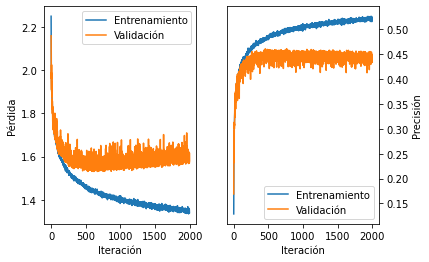

In [12]:
graficar_resultados(historia)

#Poco aprendizaje en el set de validaciòn, deficiente precisión.
# aunque, el aprendizaje en el set de entrenamiento puede mejorar con más iteraciones.

# Estamos ante un caso de UNDERFITTING, principalmente porque este modelo de Red Neuronal Simple,
# no sirve para clasificar imagener, las ideales son las redes convolucionales.

# Por consiguiente, tenemos estos inconvenientes:

# El modelo es demasiado simple,
# Muy pocas iteraciones de entrenamiento y,
# La arquitectura no es la adecuada.

In [14]:
# 3. Creación segunda red neuronal:
#-------------------------------------------------------------

# - Capa de entrada: su dimensión será 3072 (el tamaño de cada imagen aplanada)
# - Capas ocultas: 30 y 15 neuronas con activación ReLU
# - Capa de salida: función de activación 'softmax' (clasificación multiclase) y un
#     total de 10 categorías


input_dim = X_train.shape[1]
output_dim = Y_train.shape[1]

modelo = Sequential()
modelo.add( Dense(30, input_dim=input_dim, activation='relu'))
modelo.add( Dense(15, activation='relu'))
modelo.add( Dense(output_dim, activation='softmax'))

# Compilación y entrenamiento: gradiente descendente, learning rate = 0.05, función
# de error: entropía cruzada, métrica de desempeño: precisión

sgd = SGD(lr=0.05)
modelo.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Para el entrenamiento se usarán 2000 iteraciones y un batch_size de 1024
num_epochs = 2000
batch_size = 1024
historia = modelo.fit(X_train, Y_train, validation_data = (X_test,Y_test),epochs=num_epochs, batch_size=batch_size, verbose=2)

Epoch 1/2000
49/49 - 1s - loss: 2.2758 - accuracy: 0.1531 - val_loss: 2.2300 - val_accuracy: 0.1704
Epoch 2/2000
49/49 - 1s - loss: 2.1982 - accuracy: 0.1801 - val_loss: 2.1480 - val_accuracy: 0.2039
Epoch 3/2000
49/49 - 1s - loss: 2.1223 - accuracy: 0.2129 - val_loss: 2.1386 - val_accuracy: 0.2084
Epoch 4/2000
49/49 - 1s - loss: 2.0586 - accuracy: 0.2500 - val_loss: 2.0523 - val_accuracy: 0.2634
Epoch 5/2000
49/49 - 1s - loss: 2.0134 - accuracy: 0.2761 - val_loss: 2.0097 - val_accuracy: 0.2895
Epoch 6/2000
49/49 - 1s - loss: 1.9725 - accuracy: 0.2921 - val_loss: 2.0071 - val_accuracy: 0.2900
Epoch 7/2000
49/49 - 1s - loss: 1.9403 - accuracy: 0.2969 - val_loss: 1.9284 - val_accuracy: 0.3041
Epoch 8/2000
49/49 - 1s - loss: 1.9023 - accuracy: 0.3134 - val_loss: 1.8861 - val_accuracy: 0.3253
Epoch 9/2000
49/49 - 1s - loss: 1.8793 - accuracy: 0.3225 - val_loss: 1.8543 - val_accuracy: 0.3449
Epoch 10/2000
49/49 - 1s - loss: 1.8675 - accuracy: 0.3304 - val_loss: 1.8334 - val_accuracy: 0.3481

Epoch 83/2000
49/49 - 1s - loss: 1.5697 - accuracy: 0.4386 - val_loss: 1.6371 - val_accuracy: 0.4166
Epoch 84/2000
49/49 - 1s - loss: 1.5746 - accuracy: 0.4380 - val_loss: 1.6025 - val_accuracy: 0.4313
Epoch 85/2000
49/49 - 1s - loss: 1.5646 - accuracy: 0.4434 - val_loss: 1.6516 - val_accuracy: 0.4097
Epoch 86/2000
49/49 - 1s - loss: 1.5754 - accuracy: 0.4391 - val_loss: 1.5708 - val_accuracy: 0.4365
Epoch 87/2000
49/49 - 1s - loss: 1.5672 - accuracy: 0.4387 - val_loss: 1.6144 - val_accuracy: 0.4245
Epoch 88/2000
49/49 - 1s - loss: 1.5650 - accuracy: 0.4435 - val_loss: 1.6556 - val_accuracy: 0.4061
Epoch 89/2000
49/49 - 1s - loss: 1.5678 - accuracy: 0.4393 - val_loss: 1.5889 - val_accuracy: 0.4291
Epoch 90/2000
49/49 - 1s - loss: 1.5620 - accuracy: 0.4426 - val_loss: 1.5561 - val_accuracy: 0.4412
Epoch 91/2000
49/49 - 1s - loss: 1.5614 - accuracy: 0.4439 - val_loss: 1.5727 - val_accuracy: 0.4381
Epoch 92/2000
49/49 - 1s - loss: 1.5526 - accuracy: 0.4464 - val_loss: 1.6365 - val_accurac

Epoch 164/2000
49/49 - 1s - loss: 1.4911 - accuracy: 0.4673 - val_loss: 1.5396 - val_accuracy: 0.4485
Epoch 165/2000
49/49 - 1s - loss: 1.4793 - accuracy: 0.4733 - val_loss: 1.5507 - val_accuracy: 0.4433
Epoch 166/2000
49/49 - 1s - loss: 1.4827 - accuracy: 0.4729 - val_loss: 1.5606 - val_accuracy: 0.4421
Epoch 167/2000
49/49 - 1s - loss: 1.4784 - accuracy: 0.4752 - val_loss: 1.5719 - val_accuracy: 0.4378
Epoch 168/2000
49/49 - 1s - loss: 1.4734 - accuracy: 0.4738 - val_loss: 1.5368 - val_accuracy: 0.4514
Epoch 169/2000
49/49 - 1s - loss: 1.4731 - accuracy: 0.4736 - val_loss: 1.5472 - val_accuracy: 0.4522
Epoch 170/2000
49/49 - 1s - loss: 1.4798 - accuracy: 0.4737 - val_loss: 1.5635 - val_accuracy: 0.4389
Epoch 171/2000
49/49 - 1s - loss: 1.4744 - accuracy: 0.4719 - val_loss: 1.5520 - val_accuracy: 0.4464
Epoch 172/2000
49/49 - 1s - loss: 1.4694 - accuracy: 0.4800 - val_loss: 1.5430 - val_accuracy: 0.4479
Epoch 173/2000
49/49 - 1s - loss: 1.4670 - accuracy: 0.4756 - val_loss: 1.5187 - v

Epoch 245/2000
49/49 - 1s - loss: 1.4226 - accuracy: 0.4950 - val_loss: 1.5113 - val_accuracy: 0.4675
Epoch 246/2000
49/49 - 1s - loss: 1.4235 - accuracy: 0.4915 - val_loss: 1.5379 - val_accuracy: 0.4460
Epoch 247/2000
49/49 - 1s - loss: 1.4240 - accuracy: 0.4932 - val_loss: 1.4945 - val_accuracy: 0.4685
Epoch 248/2000
49/49 - 1s - loss: 1.4245 - accuracy: 0.4933 - val_loss: 1.7330 - val_accuracy: 0.3924
Epoch 249/2000
49/49 - 1s - loss: 1.4284 - accuracy: 0.4913 - val_loss: 1.5283 - val_accuracy: 0.4637
Epoch 250/2000
49/49 - 1s - loss: 1.4213 - accuracy: 0.4968 - val_loss: 1.5142 - val_accuracy: 0.4597
Epoch 251/2000
49/49 - 1s - loss: 1.4157 - accuracy: 0.4960 - val_loss: 1.5405 - val_accuracy: 0.4578
Epoch 252/2000
49/49 - 1s - loss: 1.4163 - accuracy: 0.4948 - val_loss: 1.6011 - val_accuracy: 0.4495
Epoch 253/2000
49/49 - 1s - loss: 1.4220 - accuracy: 0.4957 - val_loss: 1.5521 - val_accuracy: 0.4536
Epoch 254/2000
49/49 - 1s - loss: 1.4182 - accuracy: 0.4969 - val_loss: 1.5291 - v

Epoch 326/2000
49/49 - 1s - loss: 1.3834 - accuracy: 0.5097 - val_loss: 1.5030 - val_accuracy: 0.4703
Epoch 327/2000
49/49 - 1s - loss: 1.3748 - accuracy: 0.5110 - val_loss: 1.5689 - val_accuracy: 0.4469
Epoch 328/2000
49/49 - 1s - loss: 1.3718 - accuracy: 0.5129 - val_loss: 1.5002 - val_accuracy: 0.4638
Epoch 329/2000
49/49 - 1s - loss: 1.3817 - accuracy: 0.5095 - val_loss: 1.4932 - val_accuracy: 0.4778
Epoch 330/2000
49/49 - 1s - loss: 1.3761 - accuracy: 0.5111 - val_loss: 1.5082 - val_accuracy: 0.4712
Epoch 331/2000
49/49 - 1s - loss: 1.3836 - accuracy: 0.5075 - val_loss: 1.4889 - val_accuracy: 0.4719
Epoch 332/2000
49/49 - 1s - loss: 1.3832 - accuracy: 0.5103 - val_loss: 1.4983 - val_accuracy: 0.4710
Epoch 333/2000
49/49 - 1s - loss: 1.3684 - accuracy: 0.5131 - val_loss: 1.5030 - val_accuracy: 0.4640
Epoch 334/2000
49/49 - 1s - loss: 1.3747 - accuracy: 0.5104 - val_loss: 1.5949 - val_accuracy: 0.4414
Epoch 335/2000
49/49 - 1s - loss: 1.3840 - accuracy: 0.5093 - val_loss: 1.5048 - v

Epoch 407/2000
49/49 - 1s - loss: 1.3662 - accuracy: 0.5153 - val_loss: 1.5249 - val_accuracy: 0.4600
Epoch 408/2000
49/49 - 1s - loss: 1.3494 - accuracy: 0.5230 - val_loss: 1.4949 - val_accuracy: 0.4722
Epoch 409/2000
49/49 - 1s - loss: 1.3369 - accuracy: 0.5257 - val_loss: 1.5227 - val_accuracy: 0.4669
Epoch 410/2000
49/49 - 1s - loss: 1.3497 - accuracy: 0.5197 - val_loss: 1.5449 - val_accuracy: 0.4681
Epoch 411/2000
49/49 - 1s - loss: 1.3545 - accuracy: 0.5194 - val_loss: 1.5654 - val_accuracy: 0.4540
Epoch 412/2000
49/49 - 1s - loss: 1.3511 - accuracy: 0.5209 - val_loss: 1.4928 - val_accuracy: 0.4736
Epoch 413/2000
49/49 - 1s - loss: 1.3485 - accuracy: 0.5212 - val_loss: 1.5399 - val_accuracy: 0.4678
Epoch 414/2000
49/49 - 1s - loss: 1.3476 - accuracy: 0.5199 - val_loss: 1.5836 - val_accuracy: 0.4467
Epoch 415/2000
49/49 - 1s - loss: 1.3439 - accuracy: 0.5235 - val_loss: 1.5014 - val_accuracy: 0.4707
Epoch 416/2000
49/49 - 1s - loss: 1.3492 - accuracy: 0.5214 - val_loss: 1.5409 - v

Epoch 488/2000
49/49 - 1s - loss: 1.3303 - accuracy: 0.5265 - val_loss: 1.5299 - val_accuracy: 0.4626
Epoch 489/2000
49/49 - 1s - loss: 1.3342 - accuracy: 0.5262 - val_loss: 1.4811 - val_accuracy: 0.4790
Epoch 490/2000
49/49 - 1s - loss: 1.3090 - accuracy: 0.5348 - val_loss: 1.5673 - val_accuracy: 0.4581
Epoch 491/2000
49/49 - 1s - loss: 1.3248 - accuracy: 0.5292 - val_loss: 1.4971 - val_accuracy: 0.4784
Epoch 492/2000
49/49 - 1s - loss: 1.3297 - accuracy: 0.5264 - val_loss: 1.4841 - val_accuracy: 0.4784
Epoch 493/2000
49/49 - 1s - loss: 1.3215 - accuracy: 0.5302 - val_loss: 1.5087 - val_accuracy: 0.4733
Epoch 494/2000
49/49 - 1s - loss: 1.3234 - accuracy: 0.5291 - val_loss: 1.5063 - val_accuracy: 0.4781
Epoch 495/2000
49/49 - 1s - loss: 1.3188 - accuracy: 0.5318 - val_loss: 1.5269 - val_accuracy: 0.4651
Epoch 496/2000
49/49 - 1s - loss: 1.3228 - accuracy: 0.5308 - val_loss: 1.4717 - val_accuracy: 0.4830
Epoch 497/2000
49/49 - 1s - loss: 1.3120 - accuracy: 0.5332 - val_loss: 1.5228 - v

Epoch 569/2000
49/49 - 1s - loss: 1.3092 - accuracy: 0.5355 - val_loss: 1.5601 - val_accuracy: 0.4628
Epoch 570/2000
49/49 - 1s - loss: 1.3014 - accuracy: 0.5377 - val_loss: 1.5166 - val_accuracy: 0.4693
Epoch 571/2000
49/49 - 1s - loss: 1.3091 - accuracy: 0.5349 - val_loss: 1.5006 - val_accuracy: 0.4767
Epoch 572/2000
49/49 - 1s - loss: 1.3080 - accuracy: 0.5357 - val_loss: 1.4802 - val_accuracy: 0.4804
Epoch 573/2000
49/49 - 1s - loss: 1.3033 - accuracy: 0.5391 - val_loss: 1.5441 - val_accuracy: 0.4685
Epoch 574/2000
49/49 - 1s - loss: 1.3097 - accuracy: 0.5344 - val_loss: 1.5850 - val_accuracy: 0.4439
Epoch 575/2000
49/49 - 1s - loss: 1.3098 - accuracy: 0.5351 - val_loss: 1.4955 - val_accuracy: 0.4822
Epoch 576/2000
49/49 - 1s - loss: 1.3035 - accuracy: 0.5404 - val_loss: 1.5165 - val_accuracy: 0.4752
Epoch 577/2000
49/49 - 1s - loss: 1.2891 - accuracy: 0.5421 - val_loss: 1.5330 - val_accuracy: 0.4681
Epoch 578/2000
49/49 - 1s - loss: 1.3078 - accuracy: 0.5365 - val_loss: 1.5284 - v

Epoch 650/2000
49/49 - 1s - loss: 1.2895 - accuracy: 0.5406 - val_loss: 1.5034 - val_accuracy: 0.4777
Epoch 651/2000
49/49 - 1s - loss: 1.2945 - accuracy: 0.5409 - val_loss: 1.4841 - val_accuracy: 0.4872
Epoch 652/2000
49/49 - 1s - loss: 1.2943 - accuracy: 0.5431 - val_loss: 1.4919 - val_accuracy: 0.4841
Epoch 653/2000
49/49 - 1s - loss: 1.2915 - accuracy: 0.5415 - val_loss: 1.5242 - val_accuracy: 0.4699
Epoch 654/2000
49/49 - 1s - loss: 1.2831 - accuracy: 0.5436 - val_loss: 1.5032 - val_accuracy: 0.4794
Epoch 655/2000
49/49 - 1s - loss: 1.2771 - accuracy: 0.5462 - val_loss: 1.5090 - val_accuracy: 0.4759
Epoch 656/2000
49/49 - 1s - loss: 1.2877 - accuracy: 0.5418 - val_loss: 1.6339 - val_accuracy: 0.4428
Epoch 657/2000
49/49 - 1s - loss: 1.2903 - accuracy: 0.5407 - val_loss: 1.5373 - val_accuracy: 0.4627
Epoch 658/2000
49/49 - 1s - loss: 1.2878 - accuracy: 0.5436 - val_loss: 1.5097 - val_accuracy: 0.4798
Epoch 659/2000
49/49 - 1s - loss: 1.2779 - accuracy: 0.5462 - val_loss: 1.5434 - v

Epoch 731/2000
49/49 - 1s - loss: 1.2560 - accuracy: 0.5532 - val_loss: 1.4893 - val_accuracy: 0.4853
Epoch 732/2000
49/49 - 1s - loss: 1.2799 - accuracy: 0.5454 - val_loss: 1.5642 - val_accuracy: 0.4655
Epoch 733/2000
49/49 - 1s - loss: 1.2773 - accuracy: 0.5479 - val_loss: 1.5129 - val_accuracy: 0.4748
Epoch 734/2000
49/49 - 1s - loss: 1.2606 - accuracy: 0.5508 - val_loss: 1.5791 - val_accuracy: 0.4596
Epoch 735/2000
49/49 - 1s - loss: 1.2760 - accuracy: 0.5458 - val_loss: 1.4990 - val_accuracy: 0.4797
Epoch 736/2000
49/49 - 1s - loss: 1.2638 - accuracy: 0.5502 - val_loss: 1.5424 - val_accuracy: 0.4609
Epoch 737/2000
49/49 - 1s - loss: 1.2700 - accuracy: 0.5477 - val_loss: 1.5818 - val_accuracy: 0.4668
Epoch 738/2000
49/49 - 1s - loss: 1.2584 - accuracy: 0.5512 - val_loss: 1.4914 - val_accuracy: 0.4849
Epoch 739/2000
49/49 - 1s - loss: 1.2669 - accuracy: 0.5502 - val_loss: 1.5002 - val_accuracy: 0.4824
Epoch 740/2000
49/49 - 1s - loss: 1.2764 - accuracy: 0.5480 - val_loss: 1.5947 - v

Epoch 812/2000
49/49 - 1s - loss: 1.2637 - accuracy: 0.5519 - val_loss: 1.6093 - val_accuracy: 0.4540
Epoch 813/2000
49/49 - 1s - loss: 1.2445 - accuracy: 0.5587 - val_loss: 1.5242 - val_accuracy: 0.4762
Epoch 814/2000
49/49 - 1s - loss: 1.2609 - accuracy: 0.5516 - val_loss: 1.5991 - val_accuracy: 0.4525
Epoch 815/2000
49/49 - 1s - loss: 1.2627 - accuracy: 0.5513 - val_loss: 1.6322 - val_accuracy: 0.4514
Epoch 816/2000
49/49 - 1s - loss: 1.2653 - accuracy: 0.5510 - val_loss: 1.5752 - val_accuracy: 0.4703
Epoch 817/2000
49/49 - 1s - loss: 1.2539 - accuracy: 0.5545 - val_loss: 1.5971 - val_accuracy: 0.4583
Epoch 818/2000
49/49 - 1s - loss: 1.2577 - accuracy: 0.5550 - val_loss: 1.5159 - val_accuracy: 0.4805
Epoch 819/2000
49/49 - 1s - loss: 1.2612 - accuracy: 0.5502 - val_loss: 1.5446 - val_accuracy: 0.4669
Epoch 820/2000
49/49 - 1s - loss: 1.2542 - accuracy: 0.5532 - val_loss: 1.5341 - val_accuracy: 0.4680
Epoch 821/2000
49/49 - 1s - loss: 1.2542 - accuracy: 0.5545 - val_loss: 1.5455 - v

Epoch 893/2000
49/49 - 1s - loss: 1.2409 - accuracy: 0.5582 - val_loss: 1.5149 - val_accuracy: 0.4805
Epoch 894/2000
49/49 - 1s - loss: 1.2509 - accuracy: 0.5536 - val_loss: 1.5390 - val_accuracy: 0.4666
Epoch 895/2000
49/49 - 1s - loss: 1.2388 - accuracy: 0.5603 - val_loss: 1.5432 - val_accuracy: 0.4737
Epoch 896/2000
49/49 - 1s - loss: 1.2498 - accuracy: 0.5575 - val_loss: 1.5245 - val_accuracy: 0.4798
Epoch 897/2000
49/49 - 1s - loss: 1.2424 - accuracy: 0.5579 - val_loss: 1.5285 - val_accuracy: 0.4783
Epoch 898/2000
49/49 - 1s - loss: 1.2353 - accuracy: 0.5643 - val_loss: 1.5439 - val_accuracy: 0.4727
Epoch 899/2000
49/49 - 1s - loss: 1.2413 - accuracy: 0.5584 - val_loss: 1.5795 - val_accuracy: 0.4577
Epoch 900/2000
49/49 - 1s - loss: 1.2471 - accuracy: 0.5564 - val_loss: 1.5408 - val_accuracy: 0.4686
Epoch 901/2000
49/49 - 1s - loss: 1.2476 - accuracy: 0.5589 - val_loss: 1.5629 - val_accuracy: 0.4693
Epoch 902/2000
49/49 - 1s - loss: 1.2371 - accuracy: 0.5608 - val_loss: 1.5309 - v

Epoch 974/2000
49/49 - 1s - loss: 1.2457 - accuracy: 0.5566 - val_loss: 1.5233 - val_accuracy: 0.4774
Epoch 975/2000
49/49 - 1s - loss: 1.2312 - accuracy: 0.5631 - val_loss: 1.5172 - val_accuracy: 0.4794
Epoch 976/2000
49/49 - 1s - loss: 1.2332 - accuracy: 0.5629 - val_loss: 1.5350 - val_accuracy: 0.4794
Epoch 977/2000
49/49 - 1s - loss: 1.2418 - accuracy: 0.5599 - val_loss: 1.5446 - val_accuracy: 0.4673
Epoch 978/2000
49/49 - 1s - loss: 1.2349 - accuracy: 0.5630 - val_loss: 1.5589 - val_accuracy: 0.4674
Epoch 979/2000
49/49 - 1s - loss: 1.2327 - accuracy: 0.5613 - val_loss: 1.5649 - val_accuracy: 0.4692
Epoch 980/2000
49/49 - 1s - loss: 1.2267 - accuracy: 0.5653 - val_loss: 1.5924 - val_accuracy: 0.4628
Epoch 981/2000
49/49 - 1s - loss: 1.2392 - accuracy: 0.5597 - val_loss: 1.6556 - val_accuracy: 0.4425
Epoch 982/2000
49/49 - 1s - loss: 1.2301 - accuracy: 0.5636 - val_loss: 1.5157 - val_accuracy: 0.4838
Epoch 983/2000
49/49 - 1s - loss: 1.2405 - accuracy: 0.5606 - val_loss: 1.5240 - v

Epoch 1054/2000
49/49 - 1s - loss: 1.2354 - accuracy: 0.5614 - val_loss: 1.6225 - val_accuracy: 0.4533
Epoch 1055/2000
49/49 - 1s - loss: 1.2169 - accuracy: 0.5699 - val_loss: 1.5759 - val_accuracy: 0.4592
Epoch 1056/2000
49/49 - 1s - loss: 1.2171 - accuracy: 0.5683 - val_loss: 1.5683 - val_accuracy: 0.4656
Epoch 1057/2000
49/49 - 1s - loss: 1.2274 - accuracy: 0.5646 - val_loss: 1.5696 - val_accuracy: 0.4635
Epoch 1058/2000
49/49 - 1s - loss: 1.2295 - accuracy: 0.5630 - val_loss: 1.5677 - val_accuracy: 0.4716
Epoch 1059/2000
49/49 - 1s - loss: 1.2177 - accuracy: 0.5691 - val_loss: 1.5731 - val_accuracy: 0.4671
Epoch 1060/2000
49/49 - 1s - loss: 1.2328 - accuracy: 0.5649 - val_loss: 1.5758 - val_accuracy: 0.4601
Epoch 1061/2000
49/49 - 1s - loss: 1.2172 - accuracy: 0.5684 - val_loss: 1.5673 - val_accuracy: 0.4707
Epoch 1062/2000
49/49 - 1s - loss: 1.2230 - accuracy: 0.5667 - val_loss: 1.5417 - val_accuracy: 0.4695
Epoch 1063/2000
49/49 - 1s - loss: 1.2111 - accuracy: 0.5691 - val_loss: 

Epoch 1134/2000
49/49 - 1s - loss: 1.2025 - accuracy: 0.5742 - val_loss: 1.6023 - val_accuracy: 0.4680
Epoch 1135/2000
49/49 - 1s - loss: 1.2247 - accuracy: 0.5634 - val_loss: 1.5940 - val_accuracy: 0.4668
Epoch 1136/2000
49/49 - 1s - loss: 1.2102 - accuracy: 0.5713 - val_loss: 1.5941 - val_accuracy: 0.4632
Epoch 1137/2000
49/49 - 1s - loss: 1.2072 - accuracy: 0.5707 - val_loss: 1.5770 - val_accuracy: 0.4714
Epoch 1138/2000
49/49 - 1s - loss: 1.2099 - accuracy: 0.5715 - val_loss: 1.6054 - val_accuracy: 0.4538
Epoch 1139/2000
49/49 - 1s - loss: 1.1998 - accuracy: 0.5746 - val_loss: 1.5512 - val_accuracy: 0.4719
Epoch 1140/2000
49/49 - 1s - loss: 1.2289 - accuracy: 0.5643 - val_loss: 1.5415 - val_accuracy: 0.4799
Epoch 1141/2000
49/49 - 1s - loss: 1.2170 - accuracy: 0.5679 - val_loss: 1.5987 - val_accuracy: 0.4636
Epoch 1142/2000
49/49 - 1s - loss: 1.2157 - accuracy: 0.5680 - val_loss: 1.5615 - val_accuracy: 0.4714
Epoch 1143/2000
49/49 - 1s - loss: 1.2178 - accuracy: 0.5677 - val_loss: 

Epoch 1214/2000
49/49 - 1s - loss: 1.2072 - accuracy: 0.5723 - val_loss: 1.5661 - val_accuracy: 0.4653
Epoch 1215/2000
49/49 - 1s - loss: 1.2063 - accuracy: 0.5694 - val_loss: 1.5340 - val_accuracy: 0.4799
Epoch 1216/2000
49/49 - 1s - loss: 1.2005 - accuracy: 0.5732 - val_loss: 1.5605 - val_accuracy: 0.4708
Epoch 1217/2000
49/49 - 1s - loss: 1.2016 - accuracy: 0.5743 - val_loss: 1.6278 - val_accuracy: 0.4553
Epoch 1218/2000
49/49 - 1s - loss: 1.2086 - accuracy: 0.5746 - val_loss: 1.6208 - val_accuracy: 0.4585
Epoch 1219/2000
49/49 - 1s - loss: 1.2158 - accuracy: 0.5669 - val_loss: 1.6299 - val_accuracy: 0.4554
Epoch 1220/2000
49/49 - 1s - loss: 1.2034 - accuracy: 0.5713 - val_loss: 1.5713 - val_accuracy: 0.4706
Epoch 1221/2000
49/49 - 1s - loss: 1.1989 - accuracy: 0.5740 - val_loss: 1.5761 - val_accuracy: 0.4699
Epoch 1222/2000
49/49 - 1s - loss: 1.1999 - accuracy: 0.5752 - val_loss: 1.5701 - val_accuracy: 0.4732
Epoch 1223/2000
49/49 - 1s - loss: 1.1902 - accuracy: 0.5775 - val_loss: 

Epoch 1294/2000
49/49 - 1s - loss: 1.1954 - accuracy: 0.5771 - val_loss: 1.5340 - val_accuracy: 0.4828
Epoch 1295/2000
49/49 - 1s - loss: 1.1908 - accuracy: 0.5769 - val_loss: 1.5651 - val_accuracy: 0.4744
Epoch 1296/2000
49/49 - 1s - loss: 1.1867 - accuracy: 0.5789 - val_loss: 1.5584 - val_accuracy: 0.4725
Epoch 1297/2000
49/49 - 1s - loss: 1.2064 - accuracy: 0.5733 - val_loss: 1.5582 - val_accuracy: 0.4756
Epoch 1298/2000
49/49 - 1s - loss: 1.1924 - accuracy: 0.5766 - val_loss: 1.5838 - val_accuracy: 0.4659
Epoch 1299/2000
49/49 - 1s - loss: 1.1997 - accuracy: 0.5723 - val_loss: 1.5866 - val_accuracy: 0.4636
Epoch 1300/2000
49/49 - 1s - loss: 1.1924 - accuracy: 0.5781 - val_loss: 1.5527 - val_accuracy: 0.4738
Epoch 1301/2000
49/49 - 1s - loss: 1.1916 - accuracy: 0.5786 - val_loss: 1.6098 - val_accuracy: 0.4689
Epoch 1302/2000
49/49 - 1s - loss: 1.1944 - accuracy: 0.5761 - val_loss: 1.5518 - val_accuracy: 0.4808
Epoch 1303/2000
49/49 - 1s - loss: 1.1810 - accuracy: 0.5779 - val_loss: 

Epoch 1374/2000
49/49 - 1s - loss: 1.1948 - accuracy: 0.5784 - val_loss: 1.5865 - val_accuracy: 0.4665
Epoch 1375/2000
49/49 - 1s - loss: 1.1795 - accuracy: 0.5814 - val_loss: 1.5947 - val_accuracy: 0.4579
Epoch 1376/2000
49/49 - 1s - loss: 1.1872 - accuracy: 0.5797 - val_loss: 1.6692 - val_accuracy: 0.4477
Epoch 1377/2000
49/49 - 1s - loss: 1.1953 - accuracy: 0.5761 - val_loss: 1.5796 - val_accuracy: 0.4664
Epoch 1378/2000
49/49 - 1s - loss: 1.1896 - accuracy: 0.5784 - val_loss: 1.5765 - val_accuracy: 0.4707
Epoch 1379/2000
49/49 - 1s - loss: 1.1864 - accuracy: 0.5797 - val_loss: 1.5979 - val_accuracy: 0.4660
Epoch 1380/2000
49/49 - 1s - loss: 1.1889 - accuracy: 0.5766 - val_loss: 1.5983 - val_accuracy: 0.4672
Epoch 1381/2000
49/49 - 1s - loss: 1.1842 - accuracy: 0.5794 - val_loss: 1.5914 - val_accuracy: 0.4628
Epoch 1382/2000
49/49 - 1s - loss: 1.1799 - accuracy: 0.5818 - val_loss: 1.5783 - val_accuracy: 0.4716
Epoch 1383/2000
49/49 - 1s - loss: 1.1931 - accuracy: 0.5784 - val_loss: 

Epoch 1454/2000
49/49 - 1s - loss: 1.1760 - accuracy: 0.5833 - val_loss: 1.6417 - val_accuracy: 0.4584
Epoch 1455/2000
49/49 - 1s - loss: 1.1940 - accuracy: 0.5741 - val_loss: 1.5695 - val_accuracy: 0.4740
Epoch 1456/2000
49/49 - 1s - loss: 1.1827 - accuracy: 0.5810 - val_loss: 1.6195 - val_accuracy: 0.4606
Epoch 1457/2000
49/49 - 1s - loss: 1.1816 - accuracy: 0.5812 - val_loss: 1.6575 - val_accuracy: 0.4496
Epoch 1458/2000
49/49 - 1s - loss: 1.1818 - accuracy: 0.5789 - val_loss: 1.5705 - val_accuracy: 0.4733
Epoch 1459/2000
49/49 - 1s - loss: 1.1680 - accuracy: 0.5864 - val_loss: 1.6006 - val_accuracy: 0.4701
Epoch 1460/2000
49/49 - 1s - loss: 1.1780 - accuracy: 0.5825 - val_loss: 1.5890 - val_accuracy: 0.4646
Epoch 1461/2000
49/49 - 1s - loss: 1.1687 - accuracy: 0.5850 - val_loss: 1.5868 - val_accuracy: 0.4708
Epoch 1462/2000
49/49 - 1s - loss: 1.1756 - accuracy: 0.5838 - val_loss: 1.5778 - val_accuracy: 0.4720
Epoch 1463/2000
49/49 - 1s - loss: 1.1721 - accuracy: 0.5835 - val_loss: 

Epoch 1534/2000
49/49 - 1s - loss: 1.1741 - accuracy: 0.5822 - val_loss: 1.6321 - val_accuracy: 0.4569
Epoch 1535/2000
49/49 - 1s - loss: 1.1705 - accuracy: 0.5836 - val_loss: 1.6360 - val_accuracy: 0.4626
Epoch 1536/2000
49/49 - 1s - loss: 1.1695 - accuracy: 0.5853 - val_loss: 1.6475 - val_accuracy: 0.4602
Epoch 1537/2000
49/49 - 1s - loss: 1.1731 - accuracy: 0.5821 - val_loss: 1.6132 - val_accuracy: 0.4592
Epoch 1538/2000
49/49 - 1s - loss: 1.1724 - accuracy: 0.5830 - val_loss: 1.6656 - val_accuracy: 0.4583
Epoch 1539/2000
49/49 - 1s - loss: 1.1697 - accuracy: 0.5845 - val_loss: 1.5977 - val_accuracy: 0.4645
Epoch 1540/2000
49/49 - 1s - loss: 1.1717 - accuracy: 0.5847 - val_loss: 1.5877 - val_accuracy: 0.4655
Epoch 1541/2000
49/49 - 1s - loss: 1.1611 - accuracy: 0.5874 - val_loss: 1.5990 - val_accuracy: 0.4617
Epoch 1542/2000
49/49 - 1s - loss: 1.1764 - accuracy: 0.5822 - val_loss: 1.6198 - val_accuracy: 0.4670
Epoch 1543/2000
49/49 - 1s - loss: 1.1683 - accuracy: 0.5864 - val_loss: 

Epoch 1614/2000
49/49 - 1s - loss: 1.1583 - accuracy: 0.5899 - val_loss: 1.6874 - val_accuracy: 0.4402
Epoch 1615/2000
49/49 - 1s - loss: 1.1664 - accuracy: 0.5862 - val_loss: 1.6414 - val_accuracy: 0.4598
Epoch 1616/2000
49/49 - 1s - loss: 1.1780 - accuracy: 0.5795 - val_loss: 1.5971 - val_accuracy: 0.4608
Epoch 1617/2000
49/49 - 1s - loss: 1.1613 - accuracy: 0.5894 - val_loss: 1.6357 - val_accuracy: 0.4516
Epoch 1618/2000
49/49 - 1s - loss: 1.1631 - accuracy: 0.5875 - val_loss: 1.5765 - val_accuracy: 0.4747
Epoch 1619/2000
49/49 - 1s - loss: 1.1647 - accuracy: 0.5862 - val_loss: 1.5858 - val_accuracy: 0.4725
Epoch 1620/2000
49/49 - 1s - loss: 1.1535 - accuracy: 0.5889 - val_loss: 1.6044 - val_accuracy: 0.4731
Epoch 1621/2000
49/49 - 1s - loss: 1.1762 - accuracy: 0.5840 - val_loss: 1.6119 - val_accuracy: 0.4659
Epoch 1622/2000
49/49 - 1s - loss: 1.1606 - accuracy: 0.5874 - val_loss: 1.6089 - val_accuracy: 0.4653
Epoch 1623/2000
49/49 - 1s - loss: 1.1561 - accuracy: 0.5910 - val_loss: 

Epoch 1694/2000
49/49 - 1s - loss: 1.1657 - accuracy: 0.5859 - val_loss: 1.6280 - val_accuracy: 0.4642
Epoch 1695/2000
49/49 - 1s - loss: 1.1456 - accuracy: 0.5923 - val_loss: 1.6008 - val_accuracy: 0.4717
Epoch 1696/2000
49/49 - 1s - loss: 1.1596 - accuracy: 0.5882 - val_loss: 1.5999 - val_accuracy: 0.4708
Epoch 1697/2000
49/49 - 1s - loss: 1.1556 - accuracy: 0.5903 - val_loss: 1.6084 - val_accuracy: 0.4683
Epoch 1698/2000
49/49 - 1s - loss: 1.1657 - accuracy: 0.5854 - val_loss: 1.6310 - val_accuracy: 0.4568
Epoch 1699/2000
49/49 - 1s - loss: 1.1644 - accuracy: 0.5865 - val_loss: 1.6293 - val_accuracy: 0.4573
Epoch 1700/2000
49/49 - 1s - loss: 1.1623 - accuracy: 0.5871 - val_loss: 1.6022 - val_accuracy: 0.4721
Epoch 1701/2000
49/49 - 1s - loss: 1.1598 - accuracy: 0.5887 - val_loss: 1.6341 - val_accuracy: 0.4580
Epoch 1702/2000
49/49 - 1s - loss: 1.1539 - accuracy: 0.5904 - val_loss: 1.5854 - val_accuracy: 0.4717
Epoch 1703/2000
49/49 - 1s - loss: 1.1596 - accuracy: 0.5864 - val_loss: 

Epoch 1774/2000
49/49 - 1s - loss: 1.1582 - accuracy: 0.5878 - val_loss: 1.6264 - val_accuracy: 0.4632
Epoch 1775/2000
49/49 - 1s - loss: 1.1445 - accuracy: 0.5929 - val_loss: 1.6727 - val_accuracy: 0.4514
Epoch 1776/2000
49/49 - 1s - loss: 1.1723 - accuracy: 0.5831 - val_loss: 1.6591 - val_accuracy: 0.4504
Epoch 1777/2000
49/49 - 1s - loss: 1.1565 - accuracy: 0.5915 - val_loss: 1.6009 - val_accuracy: 0.4703
Epoch 1778/2000
49/49 - 1s - loss: 1.1462 - accuracy: 0.5926 - val_loss: 1.6508 - val_accuracy: 0.4556
Epoch 1779/2000
49/49 - 1s - loss: 1.1446 - accuracy: 0.5939 - val_loss: 1.6628 - val_accuracy: 0.4583
Epoch 1780/2000
49/49 - 1s - loss: 1.1558 - accuracy: 0.5899 - val_loss: 1.6065 - val_accuracy: 0.4680
Epoch 1781/2000
49/49 - 1s - loss: 1.1663 - accuracy: 0.5867 - val_loss: 1.6154 - val_accuracy: 0.4665
Epoch 1782/2000
49/49 - 1s - loss: 1.1551 - accuracy: 0.5903 - val_loss: 1.6686 - val_accuracy: 0.4588
Epoch 1783/2000
49/49 - 1s - loss: 1.1497 - accuracy: 0.5935 - val_loss: 

Epoch 1854/2000
49/49 - 1s - loss: 1.1420 - accuracy: 0.5947 - val_loss: 1.6247 - val_accuracy: 0.4650
Epoch 1855/2000
49/49 - 1s - loss: 1.1560 - accuracy: 0.5901 - val_loss: 1.6290 - val_accuracy: 0.4576
Epoch 1856/2000
49/49 - 1s - loss: 1.1263 - accuracy: 0.5995 - val_loss: 1.6773 - val_accuracy: 0.4551
Epoch 1857/2000
49/49 - 1s - loss: 1.1546 - accuracy: 0.5903 - val_loss: 1.6467 - val_accuracy: 0.4571
Epoch 1858/2000
49/49 - 1s - loss: 1.1478 - accuracy: 0.5918 - val_loss: 1.6190 - val_accuracy: 0.4613
Epoch 1859/2000
49/49 - 1s - loss: 1.1298 - accuracy: 0.5986 - val_loss: 1.6326 - val_accuracy: 0.4679
Epoch 1860/2000
49/49 - 1s - loss: 1.1473 - accuracy: 0.5910 - val_loss: 1.6346 - val_accuracy: 0.4636
Epoch 1861/2000
49/49 - 1s - loss: 1.1390 - accuracy: 0.5971 - val_loss: 1.6670 - val_accuracy: 0.4500
Epoch 1862/2000
49/49 - 1s - loss: 1.1409 - accuracy: 0.5942 - val_loss: 1.6508 - val_accuracy: 0.4589
Epoch 1863/2000
49/49 - 1s - loss: 1.1596 - accuracy: 0.5898 - val_loss: 

Epoch 1934/2000
49/49 - 1s - loss: 1.1335 - accuracy: 0.5975 - val_loss: 1.6976 - val_accuracy: 0.4433
Epoch 1935/2000
49/49 - 1s - loss: 1.1398 - accuracy: 0.5955 - val_loss: 1.6764 - val_accuracy: 0.4501
Epoch 1936/2000
49/49 - 1s - loss: 1.1490 - accuracy: 0.5924 - val_loss: 1.6280 - val_accuracy: 0.4683
Epoch 1937/2000
49/49 - 1s - loss: 1.1374 - accuracy: 0.5961 - val_loss: 1.6325 - val_accuracy: 0.4659
Epoch 1938/2000
49/49 - 1s - loss: 1.1429 - accuracy: 0.5937 - val_loss: 1.6551 - val_accuracy: 0.4627
Epoch 1939/2000
49/49 - 1s - loss: 1.1449 - accuracy: 0.5952 - val_loss: 1.6480 - val_accuracy: 0.4611
Epoch 1940/2000
49/49 - 1s - loss: 1.1368 - accuracy: 0.5950 - val_loss: 1.6594 - val_accuracy: 0.4569
Epoch 1941/2000
49/49 - 1s - loss: 1.1424 - accuracy: 0.5941 - val_loss: 1.6160 - val_accuracy: 0.4658
Epoch 1942/2000
49/49 - 1s - loss: 1.1387 - accuracy: 0.5927 - val_loss: 1.6072 - val_accuracy: 0.4714
Epoch 1943/2000
49/49 - 1s - loss: 1.1367 - accuracy: 0.5983 - val_loss: 

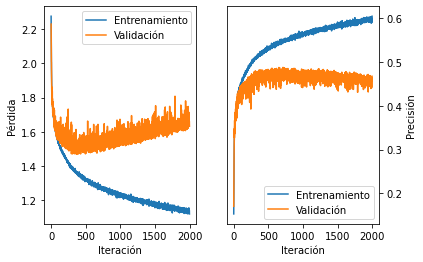

In [15]:
graficar_resultados(historia)

# A pesar de los cambios, todavia hay underfiftting, de hecho con las ultimas modificaciones 
# el desenvolvimiento del algoritmo en el set de validación la variación fue muy minima y, aunque
# en el set de entramiento se noto una mejoria no es suficiente.

In [16]:
# 4. Creación red convolucional:
# - Conv2D (32 filtros, 3x3) - Conv2D (32 filtros, 3x3) - MaxPooling2D - Dropout
# - Conv2D (64 filtros, 3x3) - Conv2D (64 filtros, 3x3) - MaxPooling2D - Dropout
# - Conv2D (128 filtros, 3x3) - Conv2D (128 filtros, 3x3) - MaxPooling2D - Dropout
# - Flatten - Dense (128) - Dropout - Salida (Dense, 10 neuronas)
#

# Reajustar el tamaño de los datos de entrenamiento y validación (aplanados anteriormente para su uso en redes neuronales)
X_train = np.reshape(X_train,(m,nrows,ncols,nplanos))
X_test = np.reshape(X_test,(n,nrows,ncols,nplanos))

# Creacion de la red convolucional

modelo = Sequential()
modelo.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
modelo.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelo.add(MaxPooling2D((2, 2)))
modelo.add(Dropout(0.2))
modelo.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelo.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelo.add(MaxPooling2D((2, 2)))
modelo.add(Dropout(0.2))
modelo.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelo.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelo.add(MaxPooling2D((2, 2)))
modelo.add(Dropout(0.2))
modelo.add(Flatten())
modelo.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
modelo.add(Dropout(0.2))
modelo.add(Dense(10, activation='softmax'))

opt = SGD(lr=0.001, momentum=0.9)
modelo.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

historia = modelo.fit(X_train, Y_train, epochs=100, batch_size=64, validation_data=(X_test, Y_test), verbose=2)

Epoch 1/100
782/782 - 181s - loss: 2.0324 - accuracy: 0.2492 - val_loss: 1.7278 - val_accuracy: 0.3841
Epoch 2/100
782/782 - 184s - loss: 1.7041 - accuracy: 0.3752 - val_loss: 1.5773 - val_accuracy: 0.4270
Epoch 3/100
782/782 - 184s - loss: 1.5793 - accuracy: 0.4232 - val_loss: 1.4560 - val_accuracy: 0.4634
Epoch 4/100
782/782 - 180s - loss: 1.4803 - accuracy: 0.4570 - val_loss: 1.3775 - val_accuracy: 0.4971
Epoch 5/100
782/782 - 182s - loss: 1.4027 - accuracy: 0.4915 - val_loss: 1.2967 - val_accuracy: 0.5299
Epoch 6/100
782/782 - 179s - loss: 1.3308 - accuracy: 0.5182 - val_loss: 1.2264 - val_accuracy: 0.5667
Epoch 7/100
782/782 - 175s - loss: 1.2708 - accuracy: 0.5430 - val_loss: 1.1361 - val_accuracy: 0.5991
Epoch 8/100
782/782 - 176s - loss: 1.2114 - accuracy: 0.5656 - val_loss: 1.0729 - val_accuracy: 0.6230
Epoch 9/100
782/782 - 177s - loss: 1.1515 - accuracy: 0.5867 - val_loss: 1.0214 - val_accuracy: 0.6391
Epoch 10/100
782/782 - 177s - loss: 1.0996 - accuracy: 0.6039 - val_loss:

Epoch 80/100
782/782 - 180s - loss: 0.3076 - accuracy: 0.8878 - val_loss: 0.5440 - val_accuracy: 0.8217
Epoch 81/100
782/782 - 177s - loss: 0.3033 - accuracy: 0.8904 - val_loss: 0.5580 - val_accuracy: 0.8195
Epoch 82/100
782/782 - 177s - loss: 0.3000 - accuracy: 0.8914 - val_loss: 0.5563 - val_accuracy: 0.8192
Epoch 83/100
782/782 - 178s - loss: 0.2980 - accuracy: 0.8926 - val_loss: 0.5656 - val_accuracy: 0.8214
Epoch 84/100
782/782 - 180s - loss: 0.2928 - accuracy: 0.8941 - val_loss: 0.5627 - val_accuracy: 0.8231
Epoch 85/100
782/782 - 186s - loss: 0.2914 - accuracy: 0.8950 - val_loss: 0.5752 - val_accuracy: 0.8243
Epoch 86/100
782/782 - 194s - loss: 0.2835 - accuracy: 0.8974 - val_loss: 0.5766 - val_accuracy: 0.8223
Epoch 87/100
782/782 - 203s - loss: 0.2856 - accuracy: 0.8968 - val_loss: 0.5813 - val_accuracy: 0.8199
Epoch 88/100
782/782 - 194s - loss: 0.2795 - accuracy: 0.8989 - val_loss: 0.5751 - val_accuracy: 0.8212
Epoch 89/100
782/782 - 193s - loss: 0.2771 - accuracy: 0.9001 - 

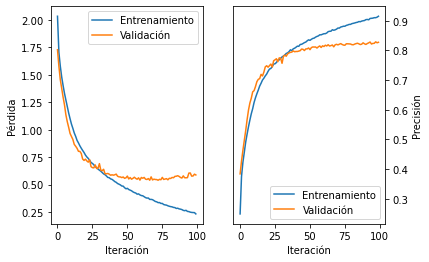

In [17]:
graficar_resultados(historia)

#Con la red neuronal convolucional, el rendimiento mejora tanto en entrenamiento como en en validaciòn,
#en torno a las 100 iteraciones se logra una precisiòn en entrenamiento del 91% y en validación del 82%



In [ ]:
# Por consiguiente, para evitar el UNDERFIFTTING, tenemos que: 

# Tener el modelo adecuado 

